In [1]:
import glob
import io
import os
from scipy.io import wavfile
import numpy as np
import IPython
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageTk
import librosa

In [2]:
df_train = pd.read_csv("./dataset/Metadata_Train3.csv")
df_test = pd.read_csv("./dataset/Metadata_Test.csv")

In [3]:
guitar = df_train[df_train['Class'] == "Sound_Guitar"]
drum = df_train[df_train['Class'] == "Sound_Drum"]
violin = df_train[df_train['Class'] == "Sound_Violin"]
piano = df_train[df_train['Class'] == "Sound_Piano"]

In [14]:
violin

,FileName,Class
1929,Violin_Sound (264).wav,Sound_Violin
1930,13_ko-donghwi_bwv1001.wav,Sound_Violin
1931,Violin_Sound (280).wav,Sound_Violin
1932,violin_sounds (40).wav,Sound_Violin
1933,violin_sound (197).wav,Sound_Violin
...,...,...
2624,Violin_Sound (58).wav,Sound_Violin
2625,17_emil-telmanyi_bwv1001.wav,Sound_Violin
2626,1_john-garner_bwv1002_mov5.wav,Sound_Violin
2627,22_emil-telmanyi_bwv1005.wav,Sound_Violin


In [9]:
gsignal, grate = librosa.load("./dataset/Train_submission/Train_submission/"+guitar["FileName"][0])
dsignal, drate = librosa.load("./dataset/Train_submission/Train_submission/"+drum["FileName"][700])
vsignal, vrate = librosa.load("./dataset/Train_submission/Train_submission/"+violin["FileName"][1929])
psignal, prate = librosa.load("./dataset/Train_submission/Train_submission/"+piano["FileName"][1400])

In [10]:
def calc_fft(y,sr):
    
    n=len(y)
    freq=np.fft.rfftfreq(n,d=1/sr)
    Y=abs(np.fft.rfft(y)/n)
    return (freq,Y)

In [11]:
fg = calc_fft(gsignal,grate)
fd = calc_fft(dsignal,drate)
fv = calc_fft(vsignal,vrate)
fp = calc_fft(psignal,prate)

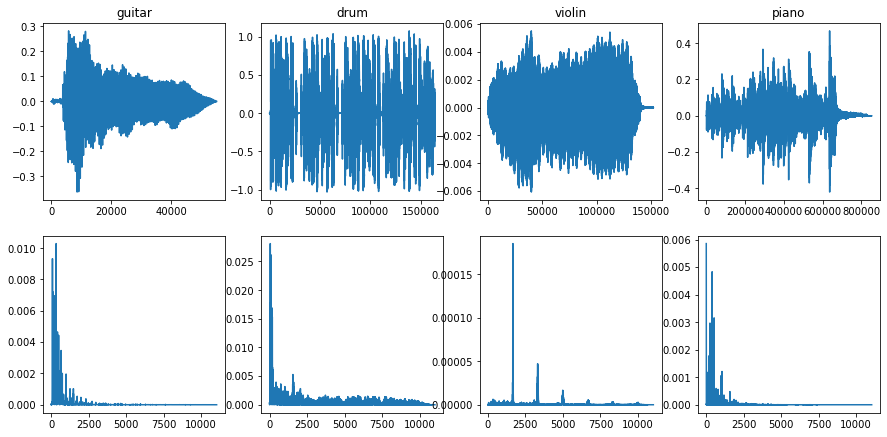

In [12]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(4,4,1)
bx = fig.add_subplot(4,4,2)
cx = fig.add_subplot(4,4,3)
dx = fig.add_subplot(4,4,4)
ax2 = fig.add_subplot(4,4,5)
bx2 = fig.add_subplot(4,4,6)
cx2 = fig.add_subplot(4,4,7)
dx2 = fig.add_subplot(4,4,8)

ax.plot(gsignal)
bx.plot(dsignal)
cx.plot(vsignal)
dx.plot(psignal)
ax2.plot(fg[0],fg[1])
bx2.plot(fd[0],fd[1])
cx2.plot(fv[0],fv[1])
dx2.plot(fp[0],fp[1])
ax.set_title("guitar")
bx.set_title("drum")
cx.set_title("violin")
dx.set_title("piano");

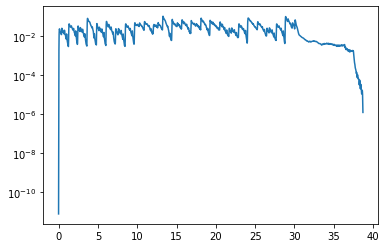

In [9]:
librosa.feature.rms(y=psignal)
S, phase = librosa.magphase(librosa.stft(psignal))
rms = librosa.feature.rms(S=S)
times = librosa.times_like(rms)
plt.semilogy(times, rms[0], label='RMS Energy')

In [187]:
np.shape(df_train)

(2629, 2)

In [13]:
import IPython.display as ipd
ipd.Audio("./dataset/Train_submission/Train_submission/"+df_train["FileName"][1929])

In [73]:
fft1,fft2 = calc_fft(signal,rate)

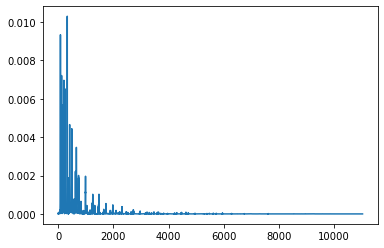

In [74]:
plt.plot(fft2,fft1)